In [59]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.3 MB/s eta 0:00:00


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, mean_squared_error,confusion_matrix, classification_report

In [24]:
kidney = pd.read_csv("//content//kidney_disease.csv")
kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [25]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [26]:
kidney.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [27]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [28]:
kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [29]:
kidney.shape

(400, 26)

In [30]:
kidney.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [31]:
kidney.drop('id', axis = 1, inplace = True)

In [32]:
kidney.corr()

<ipython-input-32-6a202aeb57b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  kidney.corr()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746


In [33]:
kidney.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

  Renaming column names to identify easily

In [34]:
kidney.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [35]:
kidney

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


Converting columns to numerical type

In [36]:
kidney["packed_cell_volume"] = pd.to_numeric(kidney["packed_cell_volume"], errors="coerce")
kidney["white_blood_cell_count"] = pd.to_numeric(kidney["white_blood_cell_count"], errors="coerce")
kidney["red_blood_cell_count"] = pd.to_numeric(kidney["red_blood_cell_count"], errors="coerce")

In [37]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [38]:
a = [col for col in kidney.columns if kidney[col].dtype == 'object']
b = [col for col in kidney.columns if kidney[col].dtype != 'object']

In [39]:
for col in a:
    print(f"{col} has {kidney[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



Replacing the incorrect values

In [ ]:
kidney["diabetes_mellitus"].replace(to_replace = {"\tno":"no","\tyes":"yes","yes":"yes"},inplace=True)
kidney["coronary_artery_disease"] = kidney["coronary_artery_disease"].replace(to_replace = "\tno", value="no")
kidney["class"] = kidney["class"].replace(to_replace = {"ckd\t": "ckd", "notckd": "not ckd"})

In [ ]:
kidney["class"] = kidney["class"].map({"ckd": 0, "not ckd": 1})
kidney["class"] = pd.to_numeric(kidney["class"], errors="coerce")

In [ ]:
columns = ["diabetes_mellitus", "coronary_artery_disease", "class"]
for col in columns:
    print(f"{col} has {kidney[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' ' yes' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [ ]:
def random_value_imputation(feature):
    random_sample = kidney[feature].dropna().sample(kidney[feature].isna().sum())
    random_sample.index = kidney[kidney[feature].isnull()].index
    kidney.loc[kidney[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = kidney[feature].mode()[0]
    kidney[feature] = kidney[feature].fillna(mode)

In [ ]:
for col in a:
    impute_mode(col)
for col in b:
    random_value_imputation(col)

In [ ]:
kidney.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [ ]:
kidney.corr()

<ipython-input-38-6a202aeb57b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  kidney.corr()


,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
age,1.000000,0.143634,-0.160874,0.066749,0.215140,0.223693,0.186922,0.138147,-0.084739,0.048632,-0.200494,-0.224427,0.102556,-0.180891,-0.224123
blood_pressure,0.143634,1.000000,-0.130158,0.121444,0.196270,0.150320,0.171858,0.143092,-0.100652,0.007907,-0.296210,-0.232981,0.031631,-0.198102,-0.287286
specific_gravity,-0.160874,-0.130158,1.000000,-0.419891,-0.248138,-0.268041,-0.251125,-0.219601,0.197375,-0.032033,0.467352,0.453777,-0.113321,0.358540,0.655394
albumin,0.066749,0.121444,-0.419891,1.000000,0.243446,0.290811,0.349971,0.204645,-0.242737,0.119248,-0.470524,-0.373379,0.151396,-0.310473,-0.543315
sugar,0.215140,0.196270,-0.248138,0.243446,1.000000,0.546754,0.159087,0.118428,-0.080207,0.121135,-0.167506,-0.217055,0.139444,-0.139849,-0.310462
blood_glucose_random,0.223693,0.150320,-0.268041,0.290811,0.546754,1.000000,0.162938,0.174157,-0.255821,0.002570,-0.228098,-0.212185,0.111086,-0.180697,-0.370085
blood_urea,0.186922,0.171858,-0.251125,0.349971,0.159087,0.162938,1.000000,0.564942,-0.274856,0.238453,-0.486430,-0.454911,0.018323,-0.348132,-0.350946
serum_creatinine,0.138147,0.143092,-0.219601,0.204645,0.118428,0.174157,0.564942,1.000000,-0.588867,0.161804,-0.284392,-0.302390,-0.026669,-0.251780,-0.293217
sodium,-0.084739,-0.100652,0.197375,-0.242737,-0.080207,-0.255821,-0.274856,-0.588867,1.000000,0.041179,0.275143,0.267650,0.002500,0.235366,0.317265
potassium,0.048632,0.007907,-0.032033,0.119248,0.121135,0.002570,0.238453,0.161804,0.041179,1.000000,-0.050065,-0.058075,-0.045960,-0.069572,-0.070390


Plotting graphs to check for numerical features distribution

<ipython-input-53-9ddd794417fe>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kidney[column])
<ipython-input-53-9ddd794417fe>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kidney[column])
<ipython-input-53-9ddd794417fe>:6: UserWarning: 

`distplot` is a deprecated function and will be remo

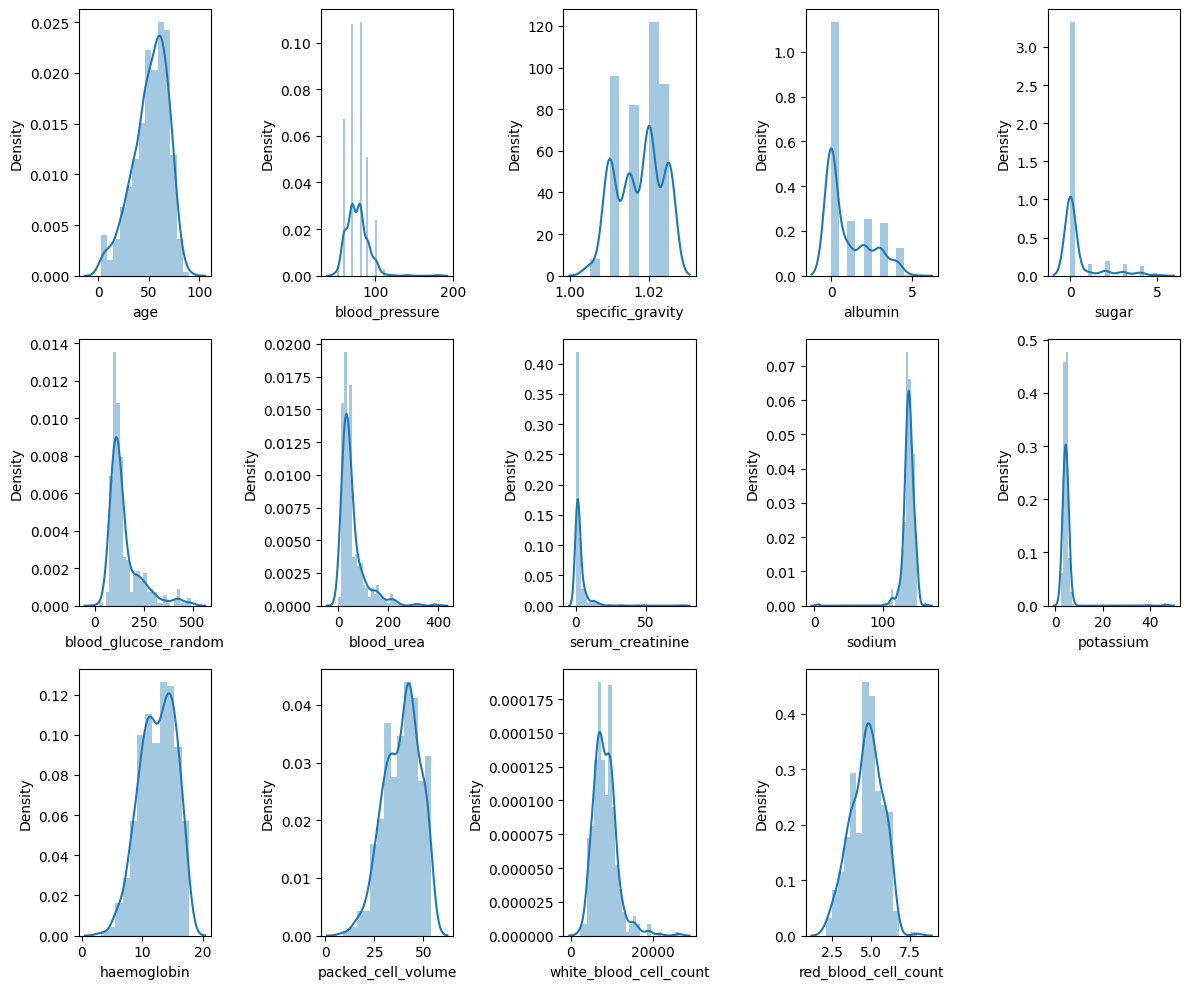

In [ ]:
plt.figure(figsize = (12, 10))
plotnumber = 1
for column in b:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(kidney[column])
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()

Plotting graphs to look at categorical columns

<ipython-input-58-8a939d104ec3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(kidney[column], palette='pastel')
<ipython-input-58-8a939d104ec3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(kidney[column], palette='pastel')
<ipython-input-58-8a939d104ec3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(kidney[column], palette='pastel')
<ipython-input-58-8a939d104ec3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` 

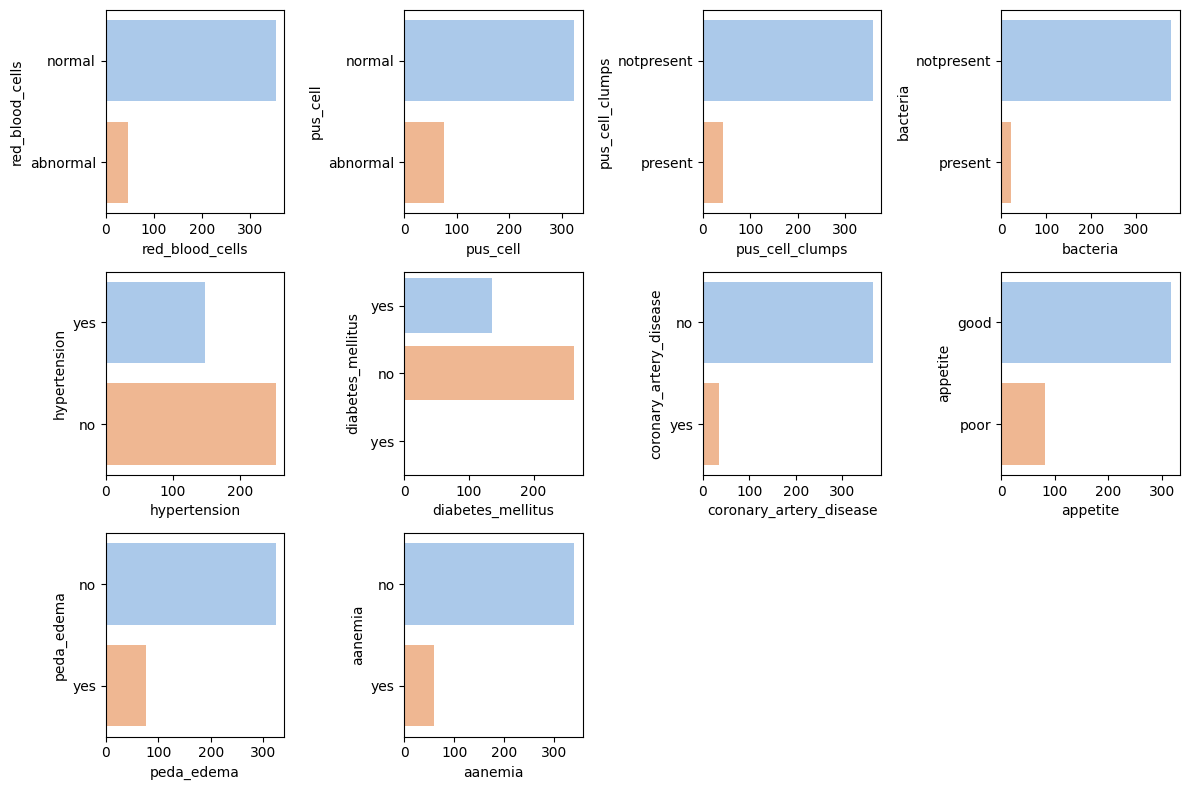

In [ ]:
plt.figure(figsize = (12, 8))
plotnumber = 1
for column in a:
    if column != 'class' and plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(kidney[column], palette='pastel')
        plt.xlabel(column)
        plotnumber += 1
plt.tight_layout()
plt.show()

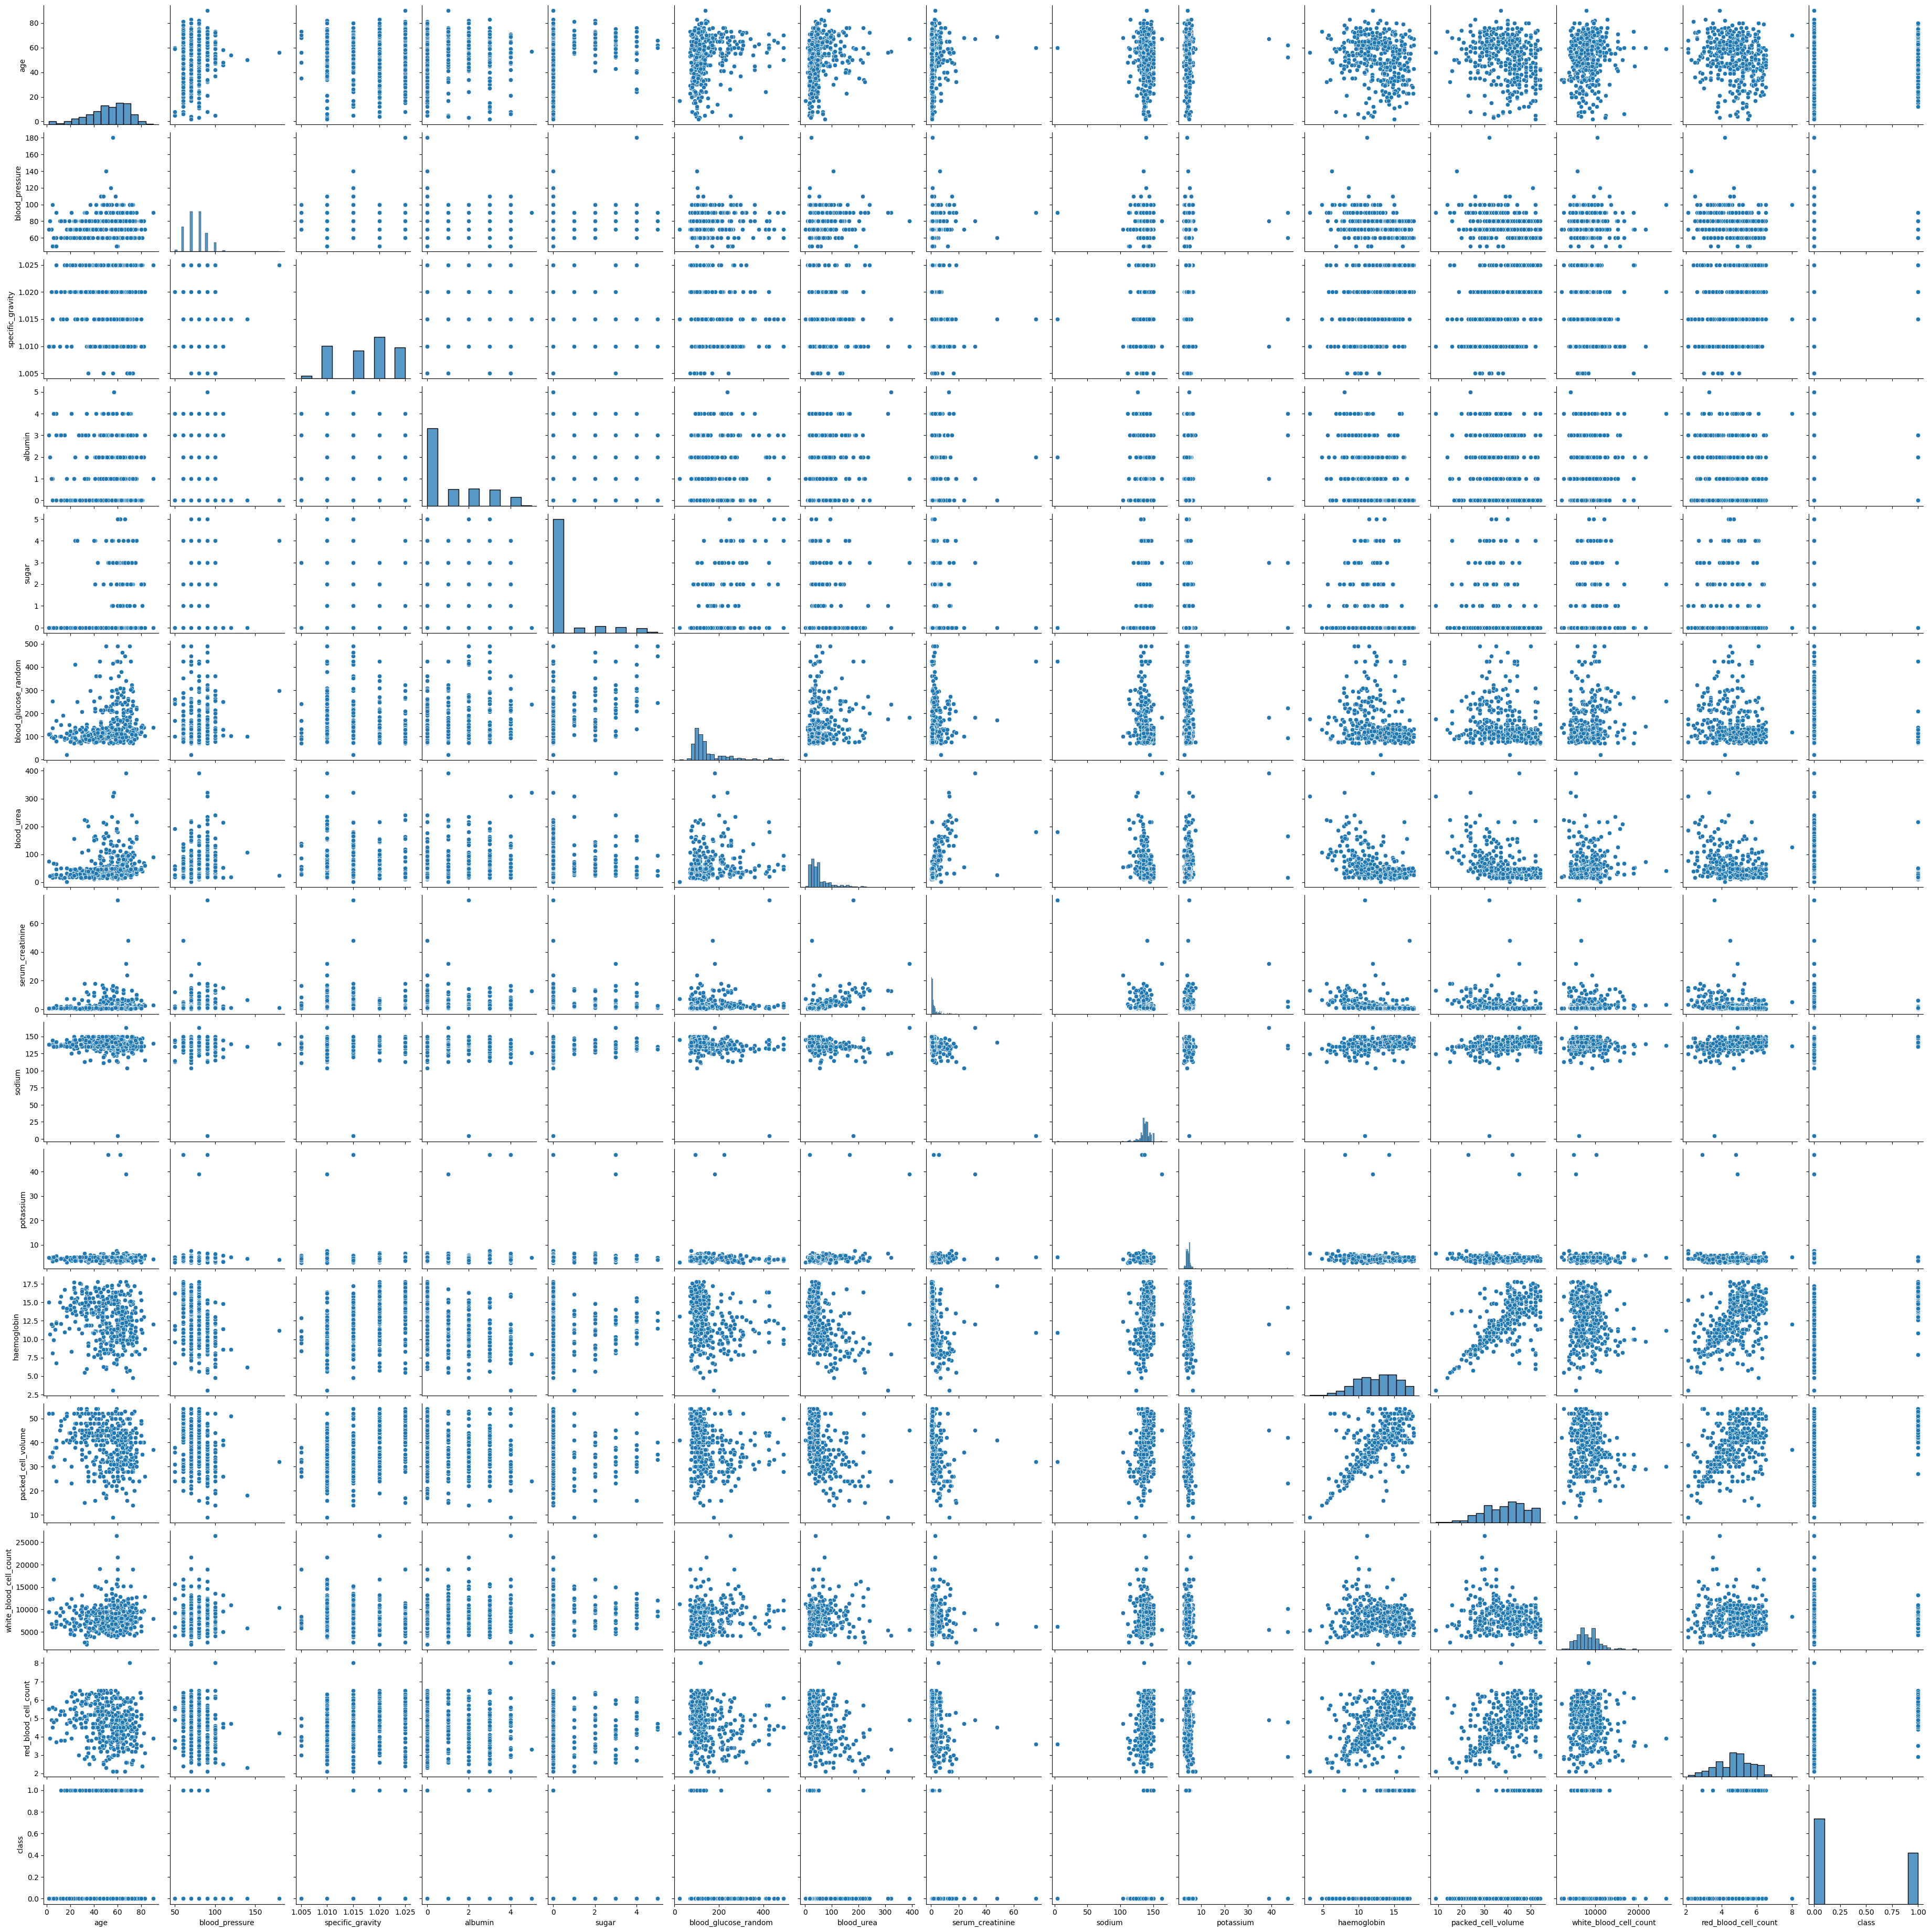

In [ ]:
sns.pairplot(data= kidney)
plt.show()

<ipython-input-62-83d6f887761f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(kidney.corr(), annot = True, linewidths = 2)


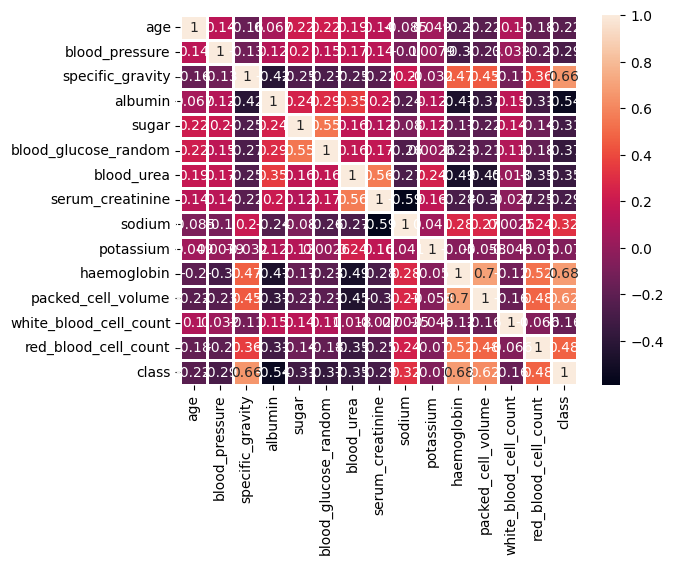

<Figure size 1500x800 with 0 Axes>

In [ ]:
sns.heatmap(kidney.corr(), annot = True, linewidths = 2)
plt.figure(figsize = (15, 8))
plt.show()

Plotting graphs to compare two columns

<ipython-input-73-6f5af11efbb9>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=column1, y=column2, data=data, ax=axes[0, 0], palette=[colors[column1], colors[column2]])


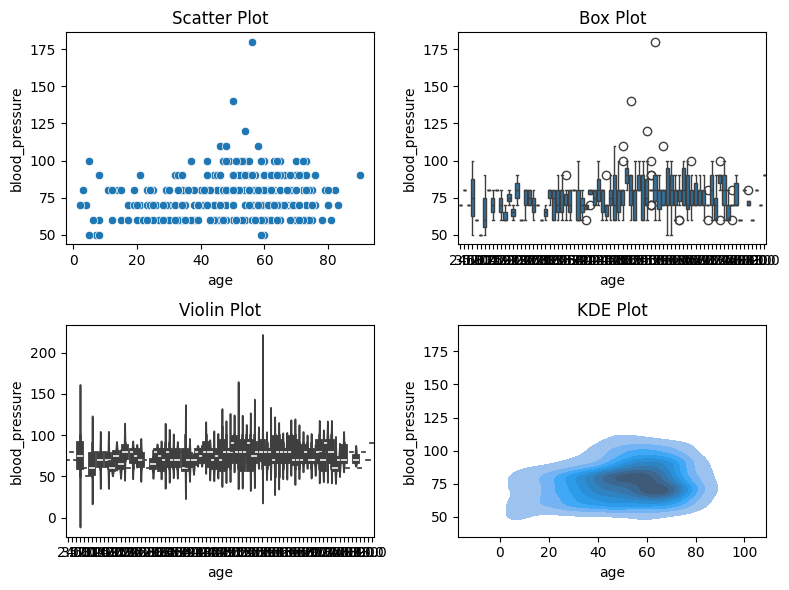

In [ ]:
columns_to_compare = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells',
                     'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea',
                     'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume',
                     'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
                     'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
colors = {"age" : "olive" , "blood_pressure" : "teal"}

# Function to compare two columns using different plots
def compare_columns(column1, column2, data):
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))

    # Scatter plot
    sns.scatterplot(x=column1, y=column2, data=data, ax=axes[0, 0], palette=[colors[column1], colors[column2]])
    axes[0, 0].set_title('Scatter Plot')

    # Box plot
    sns.boxplot(x=column1, y=column2, data=data, ax=axes[0, 1])
    axes[0, 1].set_title('Box Plot')

    # Violin plot
    sns.violinplot(x=column1, y=column2, data=data, ax=axes[1, 0])
    axes[1, 0].set_title('Violin Plot')

    # KDE plot
    sns.kdeplot(data=data, x=column1, y=column2, fill=True, ax=axes[1, 1])
    axes[1, 1].set_title('KDE Plot')

    plt.tight_layout()
    plt.show()
# Select two columns for comparison
column1 = "age"
column2 = "blood_pressure"
# Call the function to compare the selected columns
compare_columns(column1, column2, kidney)


In [8]:
for col in a:
    print(f"{col} has {kidney[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

pcv has 44 categories

wc has 92 categories

rc has 49 categories

htn has 2 categories

dm has 5 categories

cad has 3 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories

classification has 3 categories



In [40]:
label = LabelEncoder()
for col in a:
    kidney[col] = label.fit_transform(kidney[col])
label

LabelEncoder()

In [41]:
kidney.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [67]:
independent_col = [col for col in kidney.columns if col != 'class']
dependent_col = 'class'

X = kidney[independent_col]
y = kidney[dependent_col]

In [68]:
X

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,4,1,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,NaN,...,11.3,38.0,6000.0,NaN,0,3,1,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,NaN,0,4,1,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,3,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,3,1,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,3,1,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,3,1,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,3,1,0,0,0


In [56]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    2
396    2
397    2
398    2
399    2
Name: class, Length: 400, dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [74]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

LinearRegression

In [86]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_imputed, y_train)

y_pred_train = lin_reg.predict(X_train_imputed)
y_pred_test = lin_reg.predict(X_test_imputed)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Mean Squared Error on training set: {mse_train}")
print(f"Mean Squared Error on test set: {mse_test}")

Mean Squared Error on training set: 0.2069786670056749
Mean Squared Error on test set: 0.2699735377887103


LogisticRegression

In [85]:
log_reg = LogisticRegression()
log_reg.fit(X_train_imputed, y_train)


log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test_imputed))


print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, log_reg.predict(X_train_imputed))}")
print(f"Test Accuracy of Logistic Regression is {log_reg_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, log_reg.predict(X_test_imputed))}\n")
print(f"Classification Report :- \n {classification_report(y_test, log_reg.predict(X_test_imputed))}")

Training Accuracy of Logistic Regression is 0.9214285714285714
Test Accuracy of Logistic Regression is 0.875 

Confusion Matrix :- 
[[65  0  6]
 [ 1  0  0]
 [ 8  0 40]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        71
           1       0.00      0.00      0.00         1
           2       0.87      0.83      0.85        48

    accuracy                           0.88       120
   macro avg       0.58      0.58      0.58       120
weighted avg       0.87      0.88      0.87       120



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier()
knn.fit(X_train_imputed, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test_imputed))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train_imputed))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test_imputed))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test_imputed))}")


Training Accuracy of KNN is 0.8178571428571428
Test Accuracy of KNN is 0.7333333333333333 

Confusion Matrix :- 
[[47  0 24]
 [ 0  0  1]
 [ 7  0 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.66      0.75        71
           1       0.00      0.00      0.00         1
           2       0.62      0.85      0.72        48

    accuracy                           0.73       120
   macro avg       0.50      0.51      0.49       120
weighted avg       0.76      0.73      0.73       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier

In [76]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_imputed, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test_imputed))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train_imputed))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test_imputed))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test_imputed))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9416666666666667 

Confusion Matrix :- 
[[68  0  3]
 [ 1  0  0]
 [ 3  0 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.00      0.00      0.00         1
           2       0.94      0.94      0.94        48

    accuracy                           0.94       120
   macro avg       0.63      0.63      0.63       120
weighted avg       0.93      0.94      0.94       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyper parameter tuning of DecisionTreeClassifier

In [107]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 2, 3, 5, 7],
    'min_samples_split': [1, 2, 3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv=5, n_jobs=-1, verbose=1)
grid_search_dtc.fit(X_train_imputed, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


1200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/p

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

Printing the best parameters and best score

In [108]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'best'}
0.9785714285714286


Printing the Best Estimator

In [ ]:
dtc = grid_search_dtc.best_estimator_

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

RandomForestClassifier

In [82]:
rd_clf = RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto',
                                min_samples_leaf=2, min_samples_split=3, n_estimators=130)
rd_clf.fit(X_train_imputed, y_train)


rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test_imputed))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train_imputed))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test_imputed))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test_imputed))}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training Accuracy of Random Forest Classifier is 0.9964285714285714
Test Accuracy of Random Forest Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[71  0  0]
 [ 1  0  0]
 [ 4  0 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       0.00      0.00      0.00         1
           2       1.00      0.92      0.96        48

    accuracy                           0.96       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.95      0.96      0.95       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBClassifier

In [88]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train_imputed, y_train)

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 0.9857142857142858
Test Accuracy of XgBoost is 0.9416666666666667 

Confusion Matrix :- 
[[69  0  2]
 [ 1  0  0]
 [ 4  0 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.00      0.00      0.00         1
           2       0.96      0.92      0.94        48

    accuracy                           0.94       120
   macro avg       0.63      0.63      0.63       120
weighted avg       0.93      0.94      0.94       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoostClassifier

In [90]:
ada = AdaBoostClassifier(base_estimator=dtc)
ada.fit(X_train_imputed, y_train)

ada_acc = accuracy_score(y_test, ada.predict(X_test_imputed))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train_imputed))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test_imputed))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test_imputed))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.925 

Confusion Matrix :- 
[[66  0  5]
 [ 1  0  0]
 [ 3  0 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94        71
           1       0.00      0.00      0.00         1
           2       0.90      0.94      0.92        48

    accuracy                           0.93       120
   macro avg       0.61      0.62      0.62       120
weighted avg       0.92      0.93      0.92       120



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pred

GradientBoostingClassifier

In [92]:
gb = GradientBoostingClassifier()
gb.fit(X_train_imputed, y_train)

gb_acc = accuracy_score(y_test, gb.predict(X_test_imputed))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train_imputed))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test_imputed))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test_imputed))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.975 

Confusion Matrix :- 
[[71  0  0]
 [ 1  0  0]
 [ 2  0 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       0.00      0.00      0.00         1
           2       1.00      0.96      0.98        48

    accuracy                           0.97       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.97      0.97      0.97       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Stochastic Gradient Boosting Classifier

In [94]:
sgb = GradientBoostingClassifier(max_depth=4, subsample=0.90, max_features=0.75, n_estimators=200)
sgb.fit(X_train_imputed, y_train)

sgb_acc = accuracy_score(y_test, sgb.predict(X_test_imputed))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train_imputed))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test_imputed))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test_imputed))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.975 

Confusion Matrix :- 
[[71  0  0]
 [ 1  0  0]
 [ 2  0 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       0.00      0.00      0.00         1
           2       1.00      0.96      0.98        48

    accuracy                           0.97       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.97      0.97      0.97       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train_imputed, y_train)

Learning rate set to 0.5
0:	learn: 0.5791917	total: 1.79ms	remaining: 16.1ms
1:	learn: 0.3870239	total: 3.14ms	remaining: 12.6ms
2:	learn: 0.2735323	total: 4.67ms	remaining: 10.9ms
3:	learn: 0.2143450	total: 6.35ms	remaining: 9.52ms
4:	learn: 0.1668152	total: 8.04ms	remaining: 8.04ms
5:	learn: 0.1336016	total: 9.65ms	remaining: 6.44ms
6:	learn: 0.1096534	total: 11.2ms	remaining: 4.82ms
7:	learn: 0.0941606	total: 13ms	remaining: 3.26ms
8:	learn: 0.0787154	total: 14.5ms	remaining: 1.61ms
9:	learn: 0.0693506	total: 16.2ms	remaining: 0us


In [98]:
cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 0.9857142857142858
Test Accuracy of Cat Boost Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[71  0  0]
 [ 1  0  0]
 [ 4  0 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       0.00      0.00      0.00         1
           2       1.00      0.92      0.96        48

    accuracy                           0.96       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.95      0.96      0.95       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ExtraTreesClassifier

In [100]:
etc = ExtraTreesClassifier()
etc.fit(X_train_imputed, y_train)

etc_acc = accuracy_score(y_test, etc.predict(X_test_imputed))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train_imputed))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test_imputed))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test_imputed))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[71  0  0]
 [ 1  0  0]
 [ 4  0 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       0.00      0.00      0.00         1
           2       1.00      0.92      0.96        48

    accuracy                           0.96       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.95      0.96      0.95       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LGBMClassifier

In [101]:
lgbm = LGBMClassifier(learning_rate=1)
lgbm.fit(X_train_imputed, y_train)

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test_imputed))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train_imputed))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, lgbm.predict(X_test_imputed))}\n")
print(f"Classification Report :- \n {classification_report(y_test, lgbm.predict(X_test_imputed))}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 507
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] Start training from score -0.458640
[LightGBM] [Info] Start training from score -5.634790
[LightGBM] [Info] Start training from score -1.009817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM

In [111]:
svm = SVC()
svm.fit(X_train_imputed, y_train)

# Calculating accuracies
svm_acc = accuracy_score(y_test, svm.predict(X_test_imputed))

# Printing results
print(f"Training Accuracy of SVM Classifier is {accuracy_score(y_train, svm.predict(X_train_imputed))}")
print(f"Test Accuracy of SVM Classifier is {svm_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, svm.predict(X_test_imputed))}\n")
print(f"Classification Report :- \n {classification_report(y_test, svm.predict(X_test_imputed))}")

Training Accuracy of SVM Classifier is 0.6321428571428571
Test Accuracy of SVM Classifier is 0.5916666666666667 

Confusion Matrix :- 
[[71  0  0]
 [ 1  0  0]
 [48  0  0]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.59      1.00      0.74        71
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        48

    accuracy                           0.59       120
   macro avg       0.20      0.33      0.25       120
weighted avg       0.35      0.59      0.44       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Artifical Neural Network

In [113]:
ann_model = Sequential()

ann_model.add(Dense(units=64, activation='relu', input_dim=X_train_imputed.shape[1]))
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dense(units=1, activation='sigmoid'))


ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann_model.fit(X_train_imputed, y_train, epochs=10, batch_size=32, verbose=1)

ann_prob = ann_model.predict(X_test_imputed)
ann_pred = np.round(ann_prob).flatten().astype(int)

ann_acc = accuracy_score(y_test, ann_pred)

print(f"Training Accuracy of ANN is {accuracy_score(y_train, np.round(ann_model.predict(X_train_imputed)).flatten().astype(int))}")
print(f"Test Accuracy of ANN is {ann_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ann_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, ann_pred)}")

Epoch 1/10
9/9 [==============================] - 1s 4ms/step - loss: 133.8391 - accuracy: 0.1357
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 62.3144 - accuracy: 0.2786
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 39.4917 - accuracy: 0.3000
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 48.9002 - accuracy: 0.0607
Epoch 5/10
9/9 [==============================] - 0s 3ms/step - loss: 30.3607 - accuracy: 0.1429
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 7.4657 - accuracy: 0.2821
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 15.1852 - accuracy: 0.2214
Epoch 8/10
9/9 [==============================] - 0s 3ms/step - loss: 16.0800 - accuracy: 0.2607
Epoch 9/10
9/9 [==============================] - 0s 4ms/step - loss: 11.4407 - accuracy: 0.1643
Epoch 10/10
9/9 [==============================] - 0s 3ms/step
Training Accuracy of ANN is 0.625
Test Accuracy of ANN is 0.575 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [114]:
models = pd.DataFrame({
    "Model" : ["Logistic_Regression","KNN", "Decision Tree Classifier", "Random Forest Classifier","Ada Boost Classifier",
             "Gradient Boosting Classifier", "Stochastic Gradient Boosting", "XgBoost", "Cat Boost", "Extra Trees Classifier","SVM","ANN"],
    "Score" : [log_reg_acc,knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc,svm_acc,ann_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Gradient Boosting Classifier,0.975000
6,Stochastic Gradient Boosting,0.975000
3,Random Forest Classifier,0.958333
8,Cat Boost,0.958333
9,Extra Trees Classifier,0.958333
2,Decision Tree Classifier,0.941667
7,XgBoost,0.941667
4,Ada Boost Classifier,0.925000
0,Logistic_Regression,0.875000
1,KNN,0.733333


In [115]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')